We're going to train a classifier again on the Iris flower dataset. This dataset has data on 3 species of Iris flower, their petal width and lenght, and their sepal width and length. A sepals is the part of the Iris that functions as protection for the flower in bud, and often as support for the petals when in bloom.

Each of the 3 species of Iris has a distinct relationship between sepal width and sepal length. The goal here is to build a classifier, that when given a new sepal width and sepal length, will correctly determine the species.

This time, we are going to use K-Nearest Neighbors (KNN). Find the K closest points to a new point, determine how they are classified, and classify the new point by the majority vote.

In [3]:
# load Iris dataset - it's built into scikit-learn
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
x_iris, y_iris = iris.data, iris.target

The dataset contains 3 species of Iris. Scikit-learn's SGD classifier can work with this. It will create 3 classifier lines - one separating species 0 from species 1 and 2, one separating species 1 from species 0 and 2, and one separating species 2 from species 0 and 1.

However, for simplicity, let's just look at two species - Setosa and Versicolor (labeled 0 and 1 in the dataset). This way we end up with just one classifier and it's easier to see what's happening.

In [4]:
from sklearn.preprocessing import StandardScaler

# in this Iris dataset there are many features of the Iris, e.g. sepal width and length as 
# as well as pedal width and length. in this example, we're only going to look at 2 features
# of each flower: sepal width and sepal length
#
# also, the dataset has three species of Iris flowers. let's keep things simple and only
# look at two species. that way, we have a binary classifier. y_iris is the species 
# [0, 1, or 2]
x = []
y = []
for i in range(len(y_iris)):
    if ( (y_iris[i] == 0) or (y_iris[i] == 1) ):
        x.append( x_iris[i,:2] )
        y.append( y_iris[i] )
        
x = np.array(x)
y = np.array(y)

# Feature Scaling - for each feature, calculate the average, subtract the mean value 
# from the feature value, and divide the result by their standard deviation. After scaling, 
# each feature will have a zero average, with a standard deviation of one.
scaler = StandardScaler().fit(x)
x = scaler.transform(x)

What does our 2 species dataset look like? Plot the sepal length against the sepal width and color code by species. We're looking for a linear classifier that will separate the setosa species (red) from the versicolor species (green).

Text(0,0.5,'Sepal width')

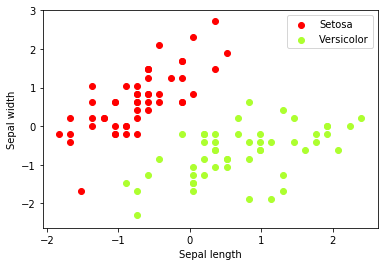

In [6]:
import matplotlib.pyplot as plt

# sort the data
setosa = []
versicolor = []
for i in range(len(x)):
    if ( y[i] == 0 ):
        setosa.append( tuple( (x[i, 0], x[i, 1]) ) )
    else:
        versicolor.append( tuple( (x[i, 0], x[i, 1]) ) )
        
plt.scatter( *zip(*setosa), color='red', label='Setosa' )
plt.scatter( *zip(*versicolor), color='greenyellow', label='Versicolor' )

plt.legend( ['Setosa', 'Versicolor'] )
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

Create the training and testing sets

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# split the dataset into a training and a testing set
# test set will be the 25% taken randomly
# random_state is a seed used by the random number generator to randomly choose the 25%
# random_state is optional, set here so that we get the same random 25% each time the
# notebook is run - for testing and validation
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=33)

The fit function is probably the most important one in scikit-learn. It receives the training data and the training classes, and builds the classifier. Every supervised learning method in scikit-learn implements this function.

In [9]:
# create the KNN classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

Plot the model on top of the data.

Text(0,0.5,'Sepal width')

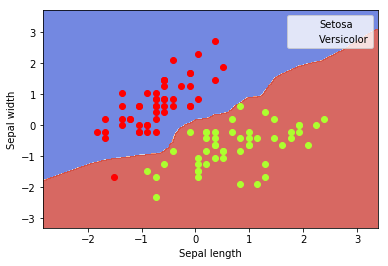

In [10]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

# get the plot axis object
axs = plt.axes()

# create a mesh of points 
h = 0.02 # stepsize for meshgrid, optional
xt = x[:,0]
yt = x[:,1] 
x_min, x_max = xt.min() - 1, xt.max() + 1
y_min, y_max = yt.min() - 1, yt.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# use the knn to make predictions within our mesh of points
predicts = knn.predict( np.c_[xx.ravel(), yy.ravel()] )
predicts = predicts.reshape(xx.shape)

# plot the predictions as a contour map
out = axs.contourf(xx, yy, predicts, cmap=plt.cm.coolwarm, alpha=0.8)

# scatter plot of our training dataset plotted on top

# sort the data
setosa = []
versicolor = []
for i in range(len(x)):
    if ( y[i] == 0 ):
        setosa.append( tuple( (x[i, 0], x[i, 1]) ) )
    else:
        versicolor.append( tuple( (x[i, 0], x[i, 1]) ) )
        
plt.scatter( *zip(*setosa), color='red', label='Setosa' )
plt.scatter( *zip(*versicolor), color='greenyellow', label='Versicolor' )

plt.legend( ['Setosa', 'Versicolor'] )
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

Let's measure the overall accuracy by trying to classify the values in our test set.

In [12]:
# measure accuracy on the testing set
from sklearn import metrics
y_pred = knn.predict(x_test)
print (metrics.accuracy_score(y_test, y_pred))

0.96


In [13]:
print (metrics.classification_report(y_test, y_pred, target_names=['setosa','versicolor']))

              precision    recall  f1-score   support

      setosa       1.00      0.88      0.93         8
  versicolor       0.94      1.00      0.97        17

   micro avg       0.96      0.96      0.96        25
   macro avg       0.97      0.94      0.95        25
weighted avg       0.96      0.96      0.96        25



In [14]:
for i in range(len(y_pred)):
    if ( y_pred[i] != y_test[i] ):
        print("Missed on", x_test[i])
        print("Predicted:", y_pred[i], "Actual:", y_test[i])

Missed on [-1.52079513 -1.67737625]
Predicted: 1 Actual: 0


Cross-validation allows us to avoid this particular case, reducing result variance and producing a more realistic score for our models.

The usual steps for k-fold cross-validation are the following:

1. Partition the dataset into k different subsets.
2. Create k different models by training on k-1 subsets and testing on the remaining subset.
3. Measure the performance on each of the k models and take the average measure.

In [15]:
# Create a new classifier: a pipeline of the standarizer and the linear model. 
# Measure the cross-validation accuracy.

from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline

# create a composite estimator made by a pipeline of the standarization and the linear model
clf = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())
])

# create a k-fold croos validation iterator of k=5 folds
cv = KFold(n_splits=5, shuffle=True, random_state=33)

# by default the score used is the one returned by score method of the estimator (accuracy)
scores = cross_val_score(knn, x, y, cv=cv)
print (scores)

[0.95 1.   1.   1.   1.  ]


In [16]:
# Calculate the mean and standard error of cross-validation accuracy

from scipy.stats import sem

def mean_score(scores):
    """Print the empirical mean score and standard error of the mean."""
    return ("Mean score: {0:.3f} (+/-{1:.3f})").format(
        np.mean(scores), sem(scores))

print (mean_score(scores))

Mean score: 0.990 (+/-0.010)
